<a href="https://colab.research.google.com/github/AlejandroJuarez98/MLEARNING20/blob/master/TAREA02_JOSE_ALEJANDRO_JUAREZ_FLORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Librería: MNIST (Set de datos).**
> **Caracteristicas:**
> - Contiene 60,000 datos de entrenamiento y 10,000 de validación
> - Cada imagén es de 28x28 pixeles. La clasificación se llevara a cabo usando 
una red neurnal con una capa oculta que contiene 15 neuronas.

In [2]:
#Importación de librerías
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Lectura, visualización y preprocesamiento de datos
(x_train, y_train), (x_test, y_test) = mnist.load_data() # 60,000 (Entrenamiento) y 10,000 (Prueba)

11493376/11490434 [==============================] - 0s 0us/step


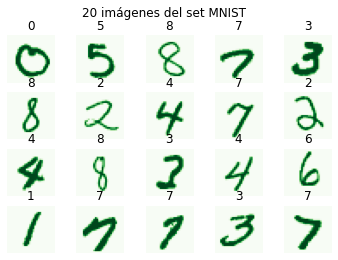

In [4]:
# Visualizaremos 20 imágenes aleatorias del set x_train
ids_imgs = np.random.randint(0, x_train.shape[0], 20)

for i in range(len(ids_imgs)):
  img = x_train[ids_imgs[i], :, :]
  plt.subplot(4, 5, i + 1)
  plt.imshow(img, cmap='Greens')
  plt.axis('off')
  plt.title(y_train[ids_imgs[i]])


plt.suptitle('20 imágenes del set MNIST')
plt.show()

In [11]:
# Pre-procesamiento: Introduciendo imágenes a la red neuronal
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))
# Normalización de matrices
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# Conversion de las variables a representación "one-hot"
nclasses = 10

Y_train = np_utils.to_categorical(y_train, num_classes=nclasses)
Y_test = np_utils.to_categorical(y_test, num_classes=nclasses)

In [12]:
# Creación del modelo:
# - Capa de entrada: Su dimensión será 784 (El tamaño de cada imágen)
# - Capa oculta: 19 neuronas con activación ReLU
# - Capa de salida: función de activación 'softmax' (clasificación multiclase) y un total de 10 categorías.
np.random.seed(1) 

input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

modelo = Sequential()
modelo.add(Dense(15, input_dim=input_dim, activation='relu'))
modelo.add(Dense(output_dim, activation='softmax'))
print(modelo.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc4949a5eb8>>


In [15]:
# Compilación y entrenamiento: gradiente descendente, learning rate = 0.05, función
# de error: entropía cruzada, métrica de desempeño: precisión.
sgd = SGD(lr=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [17]:
# Para el entrenamiento se usarán iteraciones y un batch_size de 1024
epochs = 50
batch_size = 1024
historia = modelo.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/50
59/59 - 1s - loss: 1.0767 - accuracy: 0.7034
Epoch 2/50
59/59 - 0s - loss: 0.4681 - accuracy: 0.8716
Epoch 3/50
59/59 - 0s - loss: 0.3822 - accuracy: 0.8925
Epoch 4/50
59/59 - 0s - loss: 0.3437 - accuracy: 0.9027
Epoch 5/50
59/59 - 0s - loss: 0.3211 - accuracy: 0.9095
Epoch 6/50
59/59 - 0s - loss: 0.3047 - accuracy: 0.9140
Epoch 7/50
59/59 - 0s - loss: 0.2926 - accuracy: 0.9171
Epoch 8/50
59/59 - 0s - loss: 0.2826 - accuracy: 0.9195
Epoch 9/50
59/59 - 0s - loss: 0.2738 - accuracy: 0.9219
Epoch 10/50
59/59 - 0s - loss: 0.2666 - accuracy: 0.9244
Epoch 11/50
59/59 - 0s - loss: 0.2603 - accuracy: 0.9259
Epoch 12/50
59/59 - 0s - loss: 0.2536 - accuracy: 0.9280
Epoch 13/50
59/59 - 0s - loss: 0.2483 - accuracy: 0.9295
Epoch 14/50
59/59 - 0s - loss: 0.2437 - accuracy: 0.9307
Epoch 15/50
59/59 - 0s - loss: 0.2387 - accuracy: 0.9323
Epoch 16/50
59/59 - 0s - loss: 0.2346 - accuracy: 0.9333
Epoch 17/50
59/59 - 0s - loss: 0.2306 - accuracy: 0.9340
Epoch 18/50
59/59 - 0s - loss: 0.2269 - 

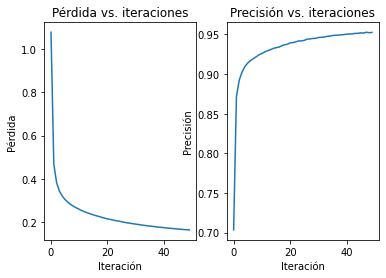

In [24]:
# Resultados
# Error y precisión vs iteraciones
plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

plt.show()

In [25]:
# Calcular la precisión sobre el set de validación
puntaje = modelo.evaluate(X_test, Y_test, verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 94.5%


In [27]:
# Obtenemos valores de prueba para validación del modelo de entrenamiento
Y_pred = modelo.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


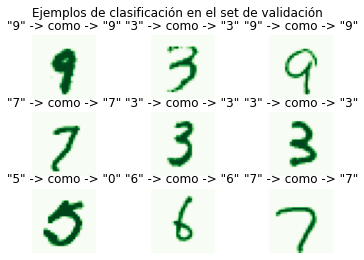

In [29]:
ids_imgs = np.random.randint(0, X_test.shape[0], 9)

for i in range(len(ids_imgs)):
  idx = ids_imgs[i]
  img = X_test[idx, :].reshape(28,28)
  cat_original = np.argmax(Y_test[idx, :])
  cat_prediccion = Y_pred[idx]

  plt.subplot(3, 3, i + 1)
  plt.imshow(img, cmap='Greens')
  plt.axis('off')
  plt.title('"{}" -> como -> "{}"'.format(cat_original, cat_prediccion))

plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()